# MACHINE LEARNING ALGORITHMS

---

## TASK #1: INTRODUCTION

In this project, I will train several classification algorithms:
1. Logistic Regression
2. Support Vector Machine
3. K- Nearest Neighbors
4. Random Forest Classifier

I'll be using a post-cleaned dataset from kaggle.

__Dataset Source:__ https://www.kaggle.com/blastchar/telco-customer-churn

Machine learning algorithms help companies analyze customer attrition rate based on several factors which includes various services subscribed by the customers, tenure rate, gender, senior citizen, payment method, etc..

## TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

     ---------------------------------------- 81.7/81.7 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=f3014b38add2dd93abef5f1f3b85930eed523532906f3883d8da30f00e32e3d5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [22]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
# from jupyterthemes import jtplot # Jupyter theme
# jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [23]:
# Read the CSV file 
telecom_df = pd.read_csv('telecom_churn.csv')

In [24]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [25]:
# Load the bottom 5 instances 
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [26]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [27]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [29]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

MINI CHALLENGE #2:
- What is the maximum and average daily minutes?

In [30]:
print('The maximum daily minutes is ', telecom_df['total_day_minutes'].max())
print('The average daily minutes is ', telecom_df['total_day_minutes'].mean())

The maximum daily minutes is  351.5
The average daily minutes is  180.2889


In [31]:
# alternatively, use describe
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## TASK #3: PERFORM DATA VISUALIZATION

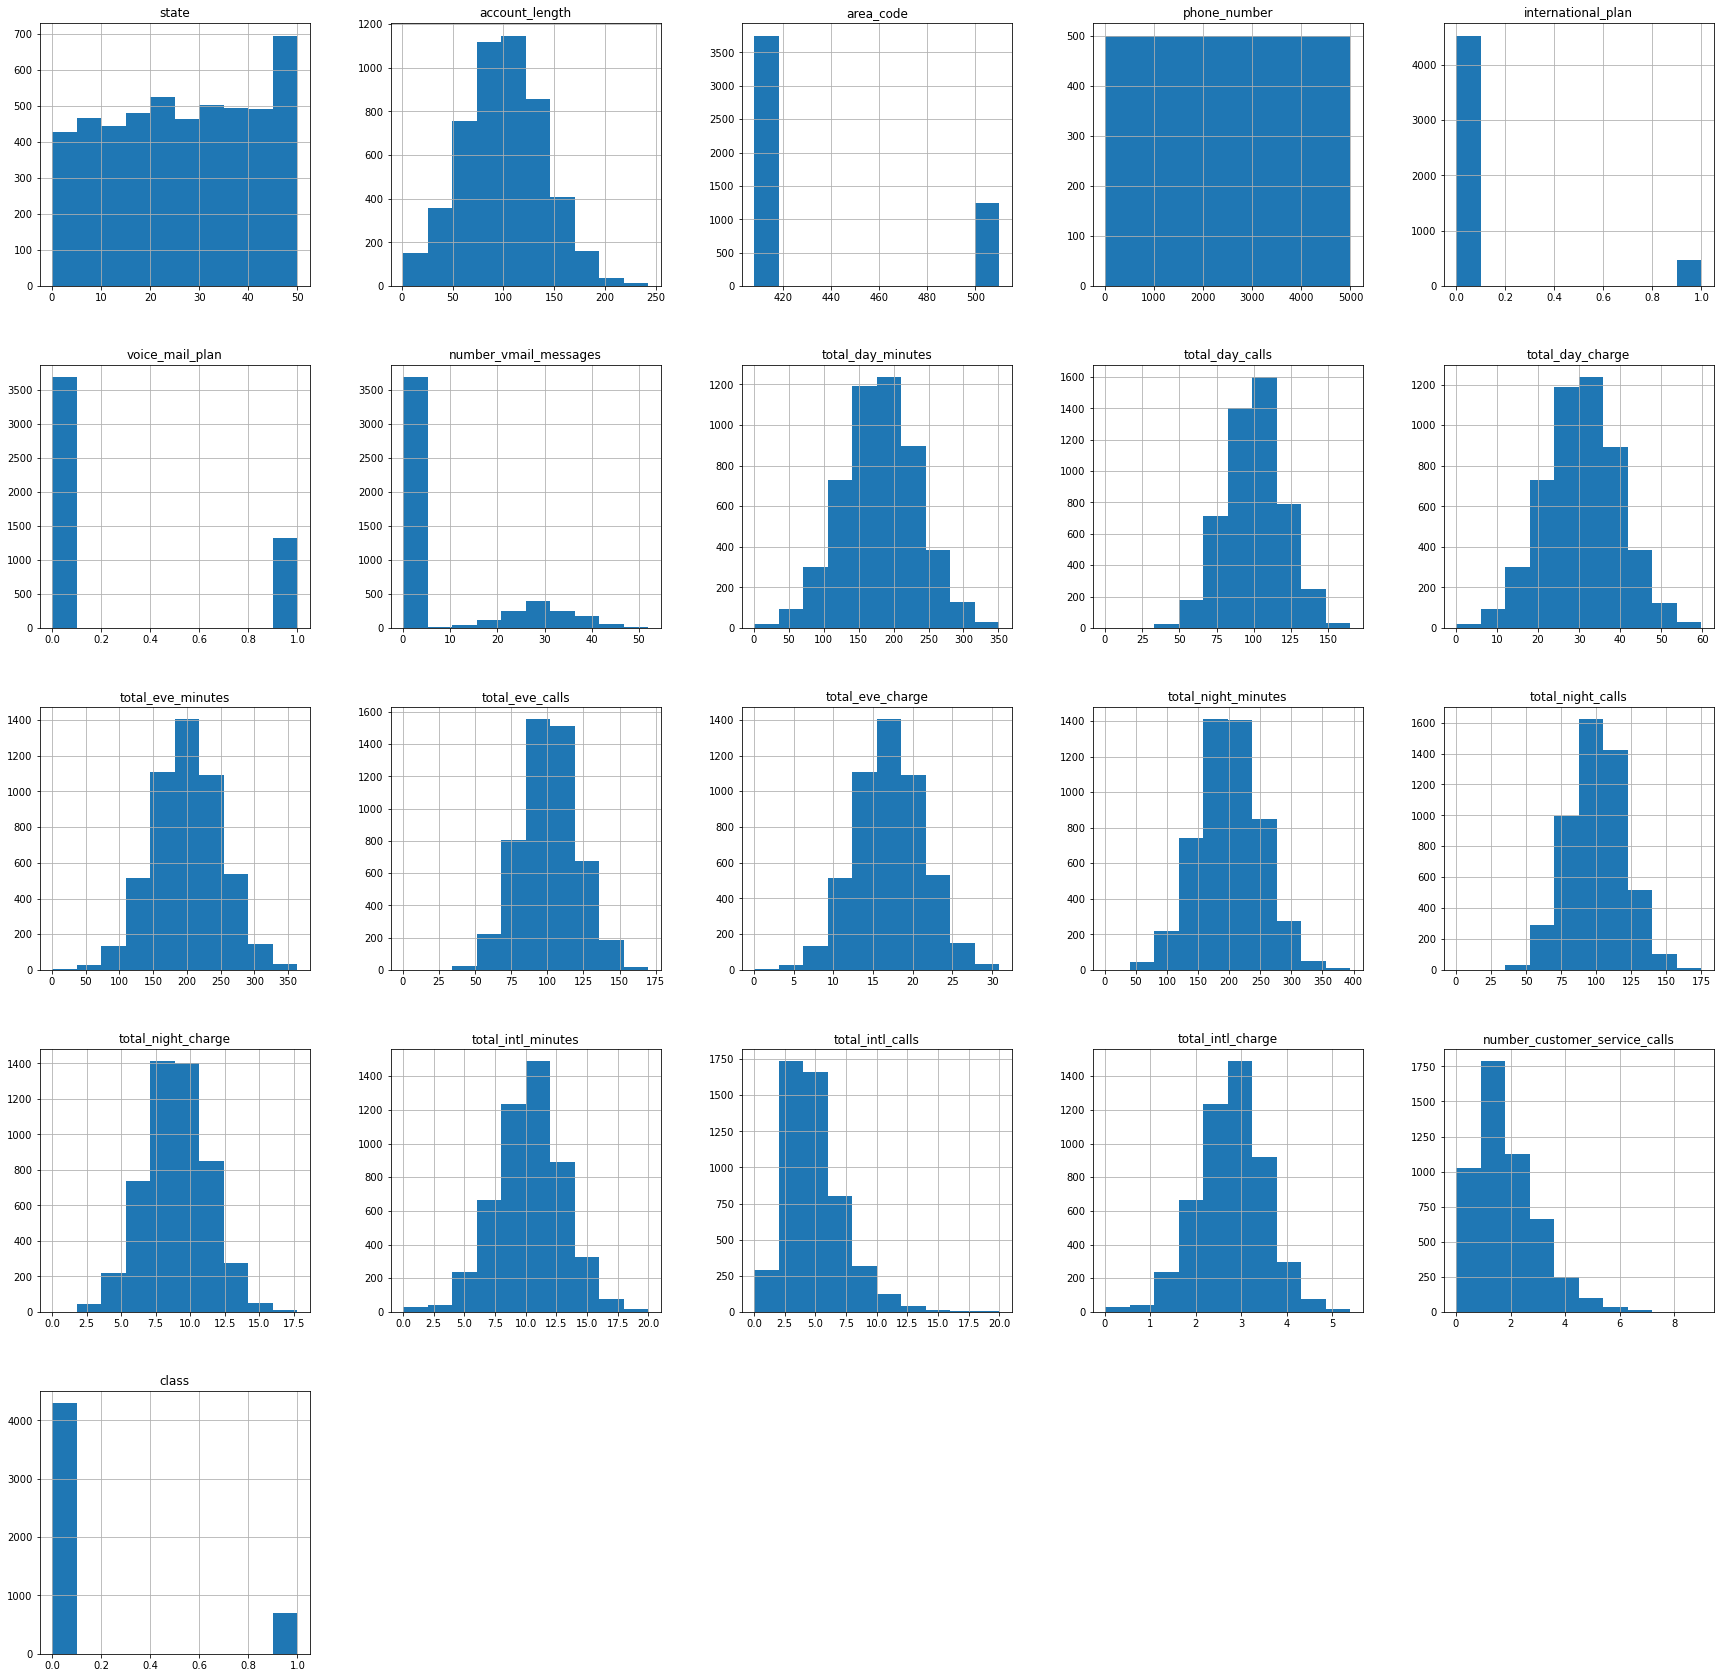

In [32]:
# plot histogram of the data
telecom_df.hist(figsize=(30, 30))
plt.show()

Here we are seeing a quick overview of different features in our dataset.

Our dataset are pre-assigned already with target class column. 0 means the customer is retained. 1 means the customer is exited or left. We'll take all the features to train a model to try to predict the column class.

In [37]:
# check the class column
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

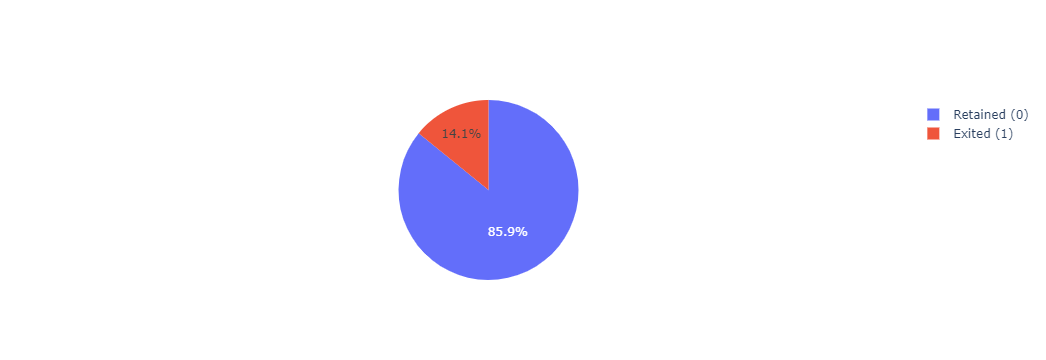

In [38]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram
import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Retained (0)', 'Exited (1)'], values = telecom_df['class'].value_counts() )])
fig.show()

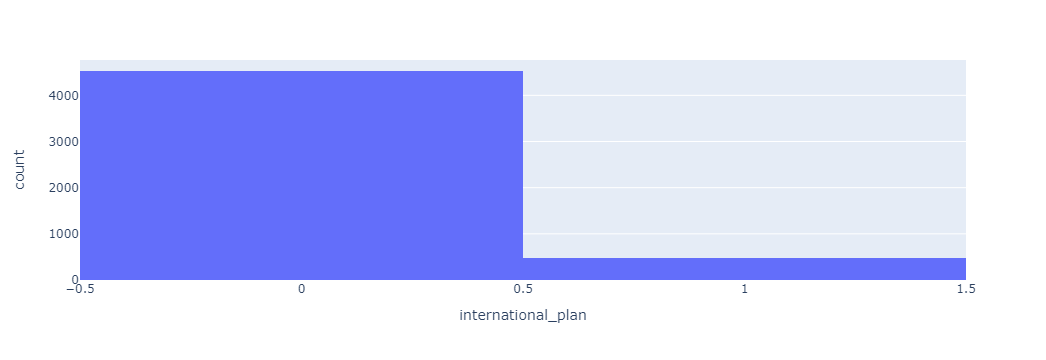

In [40]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(telecom_df, x = 'international_plan')
fig.show()


Here we see customers who do not have int'l plan (0), and those who have (1). Let's assign a color to make the histogram more appealing.

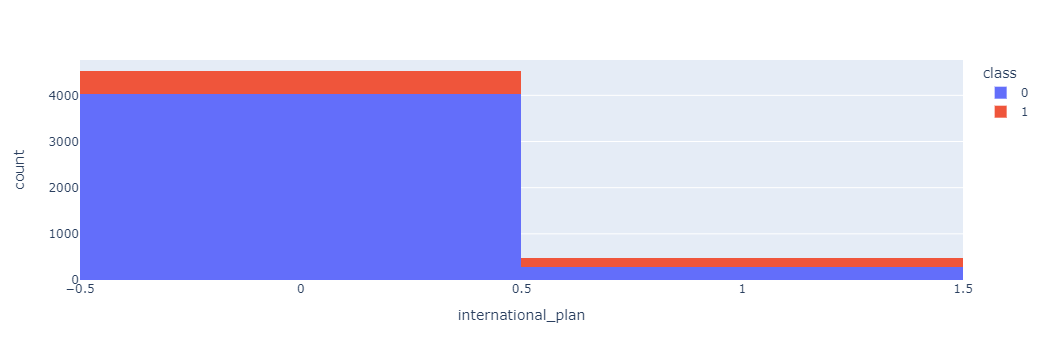

In [49]:
fig = px.histogram(telecom_df, x = 'international_plan', color = 'class')
fig.show()

Here we can identify which one belong to 0 and to 1. (the color determines that for us.)

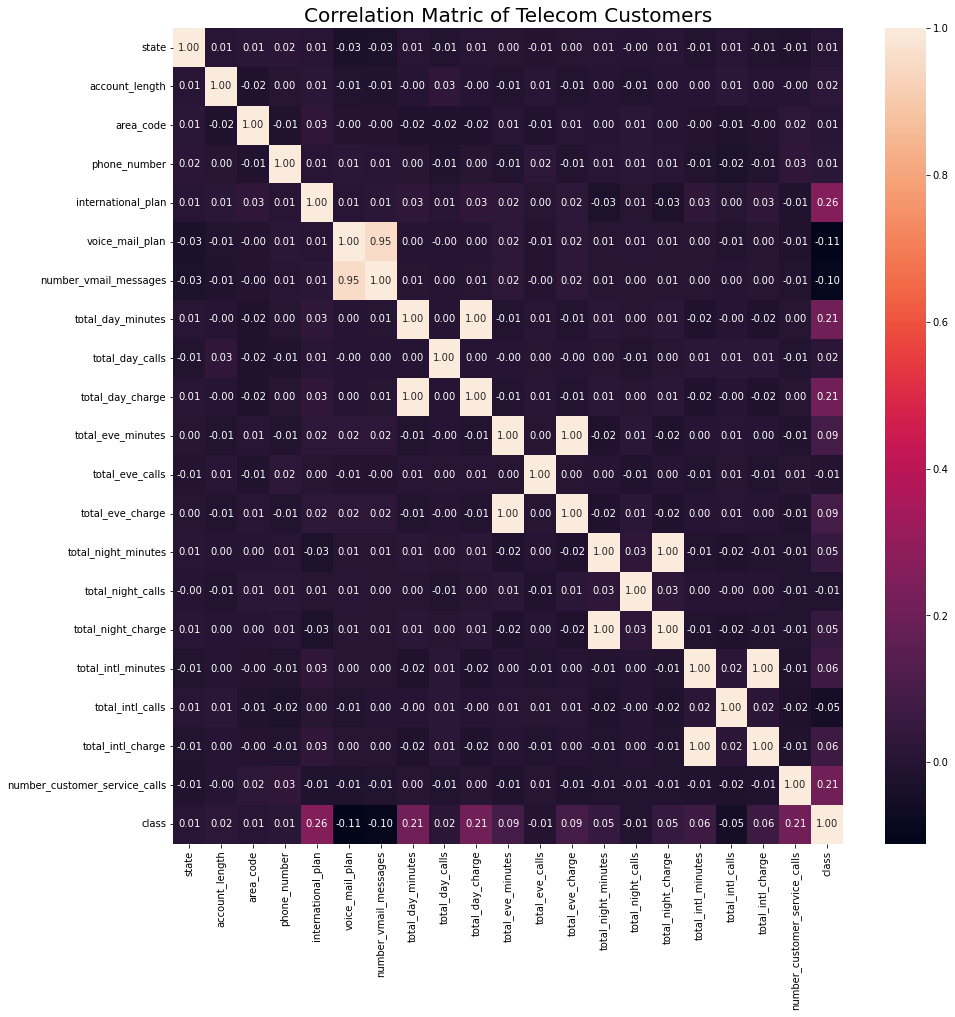

In [45]:
# Correlation Matrix
corr_matrix = telecom_df.corr()

# plot heatmap to see the matrix visually
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt = '0.2f') # fmt refers to format which sets the number of decimal value.
# add title
plt.title("Correlation Matric of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

there seems a high correlation between voice_mail_plan and voice_mail_messages.

Text(0.5, 1.0, 'Distributions of day charges by churn')

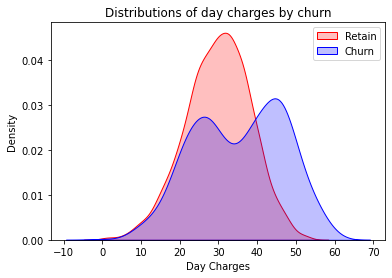

In [46]:
# let's use kde plot (kernel density) to show us the distribution of 
# our customers who belong to the class 0 and who belong to class 1.
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 0)],
                color = 'Red', shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 1)],
                color = 'Blue', shade = True)

ax.legend(["Retain", "Churn"], loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Day Charges')
ax.set_title("Distributions of day charges by churn")

Quick observations here is that the customer who have churn are tend to have more on average daily charge compare to the customers who have been retained.

Text(0.5, 1.0, 'Distributions of evening charges by churn')

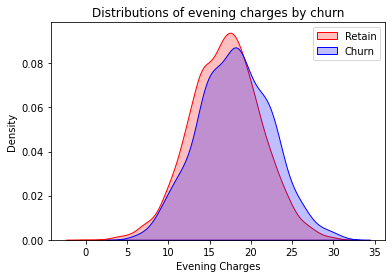

In [47]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 0)],
                color = 'Red', shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 1)],
                color = 'Blue', shade = True)

ax.legend(["Retain", "Churn"], loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Evening Charges')
ax.set_title("Distributions of evening charges by churn")

They seems pretty much the same. No significant differenct between the two.

MINI CHALLENGE #3:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

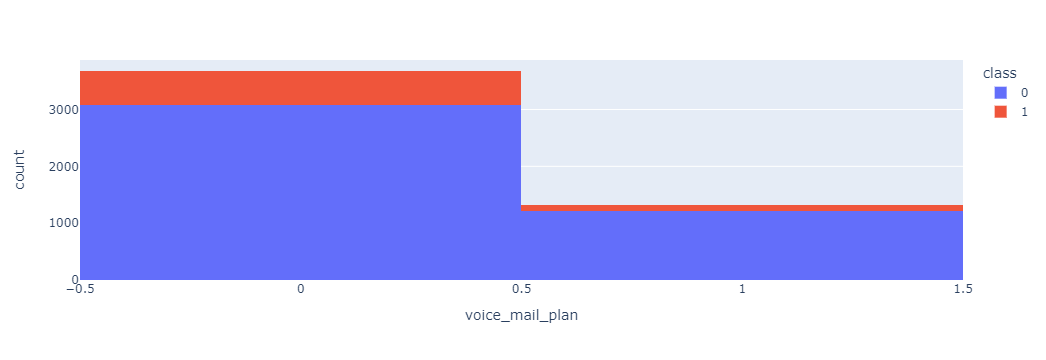

In [50]:
fig = px.histogram(telecom_df, x = 'voice_mail_plan', color = 'class')
fig.show()

## TASK #4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [52]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = 'columns') # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [53]:
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,49,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,7,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,7,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [55]:
X.shape

(5000, 18)

In [56]:
y.shape

(5000,)

In [57]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

MINI CHALLENGE #4:
- Verify that the train/test split was successfull 

In [59]:
X_train.shape

(4000, 18)

In [60]:
y_train.shape

(4000,)

In [61]:
X_test.shape

(1000, 18)

In [62]:
y_test.shape

(1000,)

In [64]:
# assess which feature in our trainnig data has the highest importance
# lets train a random foest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate our object
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel()) # values.ravel flattens this features up

RandomForestClassifier()

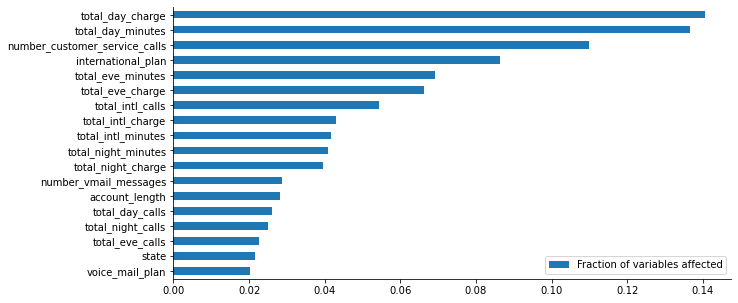

In [65]:
# Plot the feature importance
# use featue importance to find which of these features has the highest impact on the output
# create a dataframe
feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_}, index = X.columns)
# sort the dataframe from the highest one to the least important one
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
# plot the barh chart
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

When we train a random forest classifier, you're finding the most important features to study for the reason why customers are leaving this company. Maybe instead of investing on improving other features, consider what is the utmost important one.

In [17]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_charges" tops the list of important features followed by "total_day_minutes" and so on.

## TASK #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# create object of trained model
model_LR = LogisticRegression()
# instantiate our object
model_LR.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Here its telling us the the Logistic regression failed to converge.

Let's asses the performance.

In [67]:
# let's create a variable for predicting our test dataset
y_predict = model_LR.predict(X_test)

Now we have generated our prediction. Let's asses the performance of our model.

In [68]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
print(classification_report(y_test, y_predict)) # y_test is our true output coming from our data

# if the model prediction match what is contained in the testing dataset, that's great. It means that the model was accurate.

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       849
           1       0.39      0.06      0.10       151

    accuracy                           0.84      1000
   macro avg       0.62      0.52      0.51      1000
weighted avg       0.78      0.84      0.79      1000



Here we see that the model generated 78% (weighted avg and precision) accuracy.
The precision on 0 class is 85%.
On the 1 class it is 39%. Which is very low.  
Recall on o class is 0.98 which is good. While on the 1 class it is 0.06 which very terrible.  
The F1-score is the harmonic mean between precision and recall.

MINI CHALLENGE #5:
- Print out the confusion Matrix and comment on the results. 


<AxesSubplot:>

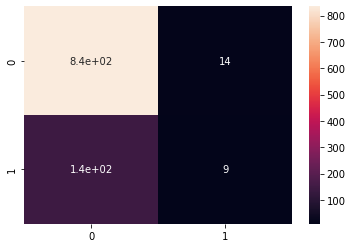

In [72]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

Here we have the visual prersentation of our model performance. The diagonal (from left top to right bottom) refers to the total number of samples that have been correctly classified. The other diagonal (from righ top to left bottom) are misclassified.

Here it seems we have misclassfied around 1400 samples. That's why it impacted our accurancy and recall.

## TASK #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [73]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC # Support Vector Classifier

model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [74]:
y_predict = model_svm.predict(X_test)

In [75]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       849
           1       0.44      0.13      0.20       151

    accuracy                           0.84      1000
   macro avg       0.65      0.55      0.55      1000
weighted avg       0.80      0.84      0.81      1000



This also shows poor performance of our model.

<AxesSubplot:>

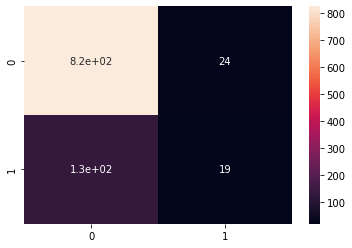

In [76]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

It seems the has misclassified alot of samples. This makes sense because if we look back, there was warning "Liblinear failed to converge, increase the number of iterations."

In [77]:
# Therefore instead, let's use calibrated classifier cv
# what this does is try to improve the performance of the classfier by calling in this function.
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC # Support Vector Classifier

model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

This still fail after the adjustments we did. We may then say that this algorithm is not fit to train a model for this.

## TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [79]:
from sklearn.ensemble import RandomForestClassifier

# instantiate our object
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [80]:
# create predict variable
# apply predict method on it using the trained model.

y_predict = model_rf.predict(X_test)

In [81]:
# print out classification report and confusion matrix
# classification report is to compare your predicted output (y_predict) vs the ground truth (y_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       849
           1       0.93      0.74      0.82       151

    accuracy                           0.95      1000
   macro avg       0.94      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000



Here we can see that the performance of the model is much better compare to the prvious models. We'v achieved 95% accuracy (weighted avg and precision). Much higher compareto the previous two classifiers. Our precision is quite high as well for class 0 and class 1. And a much recall as well.


__Note:__  
For more infor about classification report, check [here](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html#:~:text=Recall%20is%20a%20measure%20of,true%20positives%20and%20false%20negatives.).

<AxesSubplot:>

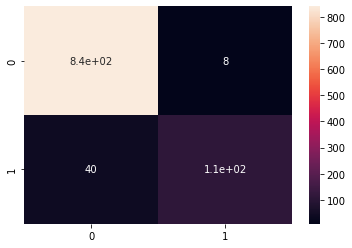

In [82]:
# print out the confusion matrix
cm = confusion_matrix(y_test, y_predict)
# plot using heatmap
sns.heatmap(cm, annot = True)

As we can see, we have achieved a much better performance compare to other classifiers we've tried. 8.4k has been correctly classified True Positive. 11k correctly classified as True Negative. On the Other hand 8 False Positive and 40 False Negative.

## TASK #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate our object
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [84]:
# create predict variable
# apply predict method on it using the trained model.

y_predict = model_knn.predict(X_test)

In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       849
           1       0.69      0.28      0.40       151

    accuracy                           0.87      1000
   macro avg       0.79      0.63      0.67      1000
weighted avg       0.86      0.87      0.85      1000



It seems our model here quite perform better than our SVM but is still worst compare to RandomForest Classifier.

<AxesSubplot:>

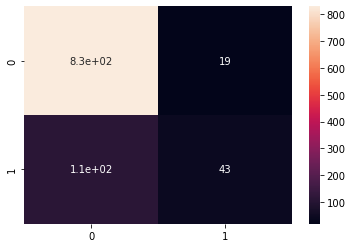

In [86]:
# print out the confusion matrix
cm = confusion_matrix(y_test, y_predict)
# plot using heatmap
sns.heatmap(cm, annot = True)

It seems we have misclassify alot of samples under False negative.

## TASK #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [89]:
y_predict = model_gnb.predict(X_test)

In [90]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       849
           1       0.56      0.49      0.52       151

    accuracy                           0.86      1000
   macro avg       0.74      0.71      0.72      1000
weighted avg       0.86      0.86      0.86      1000



The performance is quite okay.

## TASK #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [91]:
# let's import roc_curve and roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
X_test

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
371,32,56,0,0,0,197.0,110,33.49,222.8,102,18.94,225.3,91,10.14,10.6,6,2.86,2
788,1,90,0,0,0,214.9,97,36.53,117.8,117,10.01,133.7,78,6.02,11.8,2,3.19,2
3080,22,82,0,0,0,135.4,102,23.02,237.1,122,20.15,118.3,91,5.32,17.5,4,4.73,0
2260,15,88,1,1,25,288.5,114,49.05,203.4,74,17.29,228.4,117,10.28,13.0,5,3.51,1
3665,49,166,0,1,41,196.7,109,33.44,124.3,107,10.57,198.3,94,8.92,11.0,5,2.97,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,34,81,0,0,0,140.8,97,23.94,211.5,109,17.98,216.9,53,9.76,12.2,4,3.29,0
4172,26,149,0,0,0,244.2,83,41.51,262.0,72,22.27,144.5,113,6.50,7.0,4,1.89,1
3177,32,84,0,1,41,153.9,102,26.16,140.7,117,11.96,217.7,101,9.80,12.8,5,3.46,1
142,22,157,0,1,28,192.6,107,32.74,195.5,74,16.62,109.7,139,4.94,6.8,5,1.84,3


In [92]:
# Let's use predict_probability function
# Let's use one of our models above
# apply predict_proba and pass along test data set which has not been seen my the model during training

model_LR.predict_proba(X_test)

array([[0.83972678, 0.16027322],
       [0.73106812, 0.26893188],
       [0.9427773 , 0.0572227 ],
       ...,
       [0.98386058, 0.01613942],
       [0.9092281 , 0.0907719 ],
       [0.61576586, 0.38423414]])

We should see here that for each datapoints, there are two numbers in here. The first value is the probability of the output being 0. And the second value is the probability being 1. If we use only __predict__ instead of __predict_proba__, we'll only have 0 and 1.

In [95]:
model_LR.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Thus, __predict_proba__ generates probability values.

From the output of our predict_proba above, let's get only the probability output being 1 to run our roc_curve later.

In [96]:
model_LR.predict_proba(X_test)[:, 1]

array([0.16027322, 0.26893188, 0.0572227 , 0.17394218, 0.14008013,
       0.34889113, 0.01771463, 0.10813353, 0.26752654, 0.11660381,
       0.19690254, 0.05751186, 0.16831204, 0.40335745, 0.00623262,
       0.10521127, 0.07320551, 0.07862968, 0.03854614, 0.23672399,
       0.15230605, 0.19108519, 0.40638405, 0.10393779, 0.11119738,
       0.17454661, 0.0465689 , 0.11751257, 0.07970476, 0.02755142,
       0.11064427, 0.08408974, 0.15820662, 0.12162913, 0.0195746 ,
       0.02593102, 0.19216947, 0.14175774, 0.0094234 , 0.08582363,
       0.14762512, 0.02988167, 0.09840559, 0.07427674, 0.04912603,
       0.06192855, 0.16367203, 0.02856439, 0.06506157, 0.13464077,
       0.0520763 , 0.14528481, 0.02593949, 0.30406951, 0.09764411,
       0.09342515, 0.19216642, 0.25004008, 0.14170834, 0.15887784,
       0.11869345, 0.11267348, 0.03902326, 0.2729014 , 0.06956385,
       0.77065356, 0.13568057, 0.04127211, 0.07215029, 0.09968949,
       0.07636609, 0.29271125, 0.04687116, 0.13235035, 0.21705

In [98]:
# Let's check again our y_test or target class.
y_test
# Agani the values here are just 0 and 1. Which is what we aretrying to predict.

371     0
788     0
3080    0
2260    0
3665    1
       ..
3810    0
4172    0
3177    0
142     0
2113    1
Name: class, Length: 1000, dtype: int64

In [100]:
# let's run the roc_curve and it will return us the false positve rate, true positive rate and 
# threshold which is the values that we vary to plot the roc_curve
# pass along the y_test which is the desired label, then pass along our model_LR with predict_proba
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label=1)

Now let's check out the __False Positive Rate__(fpr1), the __True Positive Rate__(tpr1), and the __Threshold__(thresh1)

In [106]:
fpr1

array([0.        , 0.        , 0.        , 0.00471143, 0.00471143,
       0.01177856, 0.01177856, 0.01531213, 0.01531213, 0.01648999,
       0.01648999, 0.01766784, 0.01766784, 0.02237927, 0.02237927,
       0.02355713, 0.02355713, 0.02591284, 0.02591284, 0.02709069,
       0.02709069, 0.02826855, 0.02826855, 0.03180212, 0.03180212,
       0.03651355, 0.03651355, 0.04122497, 0.04122497, 0.04240283,
       0.04240283, 0.04358068, 0.04358068, 0.04475854, 0.04475854,
       0.05418139, 0.05418139, 0.0565371 , 0.0565371 , 0.06242638,
       0.06242638, 0.07891637, 0.07891637, 0.08598351, 0.08598351,
       0.08716137, 0.08716137, 0.09187279, 0.09187279, 0.0942285 ,
       0.0942285 , 0.09776207, 0.09776207, 0.1024735 , 0.1024735 ,
       0.10600707, 0.10600707, 0.10718492, 0.10718492, 0.1213192 ,
       0.1213192 , 0.12603062, 0.12603062, 0.12720848, 0.12720848,
       0.13191991, 0.13191991, 0.13309776, 0.13309776, 0.13545347,
       0.13545347, 0.13663133, 0.13663133, 0.15076561, 0.15076

In [104]:
tpr1

array([0.        , 0.00662252, 0.01324503, 0.01324503, 0.02649007,
       0.02649007, 0.03311258, 0.03311258, 0.05298013, 0.05298013,
       0.05960265, 0.05960265, 0.08609272, 0.08609272, 0.09933775,
       0.09933775, 0.10596026, 0.10596026, 0.1192053 , 0.1192053 ,
       0.12582781, 0.12582781, 0.15231788, 0.15231788, 0.1589404 ,
       0.1589404 , 0.16556291, 0.16556291, 0.17880795, 0.17880795,
       0.18543046, 0.18543046, 0.19205298, 0.19205298, 0.20529801,
       0.20529801, 0.21192053, 0.21192053, 0.2384106 , 0.2384106 ,
       0.24503311, 0.24503311, 0.25165563, 0.25165563, 0.25827815,
       0.25827815, 0.26490066, 0.26490066, 0.27152318, 0.27152318,
       0.2781457 , 0.2781457 , 0.29139073, 0.29139073, 0.29801325,
       0.29801325, 0.30463576, 0.30463576, 0.31125828, 0.31125828,
       0.31788079, 0.31788079, 0.32450331, 0.32450331, 0.33112583,
       0.33112583, 0.33774834, 0.33774834, 0.34437086, 0.34437086,
       0.35761589, 0.35761589, 0.37086093, 0.37086093, 0.37748

In [103]:
thresh1

array([1.93195962, 0.93195962, 0.77065356, 0.71914067, 0.67002043,
       0.55970852, 0.55549574, 0.54568239, 0.52905846, 0.52733553,
       0.51655385, 0.48972144, 0.46934386, 0.45231258, 0.44480274,
       0.42905656, 0.42670284, 0.42603883, 0.41461678, 0.41107723,
       0.40767212, 0.40638405, 0.40450471, 0.39910987, 0.39890281,
       0.38618156, 0.38423414, 0.37038646, 0.36673433, 0.36254993,
       0.36233293, 0.3613132 , 0.36050568, 0.35986404, 0.35670853,
       0.33905411, 0.33714012, 0.33537079, 0.32923945, 0.3216947 ,
       0.31851528, 0.29271125, 0.29257945, 0.28926093, 0.28876307,
       0.28839191, 0.28834891, 0.28681068, 0.28607627, 0.28213663,
       0.27997995, 0.27793638, 0.27502637, 0.26893188, 0.26859741,
       0.26697315, 0.26520237, 0.26274699, 0.26264415, 0.25847183,
       0.2568555 , 0.2512024 , 0.25034556, 0.25004008, 0.24899495,
       0.24519139, 0.24316644, 0.24289795, 0.24261578, 0.23975837,
       0.23904897, 0.2385297 , 0.23798705, 0.22917339, 0.22729

What we can notice in the above is that, the value begins with zero and starts to increase and keep going up until it reach 1. The idea here is that when we plot them, we should be able to get a nice roc_curve.

In [107]:
# ROC curve
# Now let's do the calculation for all the curves that we have for all the classifiers, models we created above.

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label=1)  # our logistic regression model
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label=1) # our support vector machine model 
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label=1)  # our random forest model
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label=1) # our k nearest neighbors model
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label=1) # our gaussian naive bayes model


In [108]:
# AUC score
# Let's calculate the Area Under the Curve which is an important metric that want to use
# pass along the y_test
# apply predict proba to all our models
# remember we are interested only in the probability of the 1 class or the second class which is target label 1

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

# Let's print the result

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7214642859928705
Support Vector Machine:  0.7982043541681292
Random Forest:  0.9073588717540699
K-Nearest Neighbors:  0.6602703609232521
Naive Bayes:  0.8409269963104236


Now we can see the Area Under the Curve (AUC) for all the classifers.

We will notice here that Random Forest is actually has the highest area unver the curve. And we have ben able to verify that using the confusion matrix and using also the classfication report.

And the worst classifier is K-Nearest Neighbors.

Now for the exciting part, let's plot these curves.

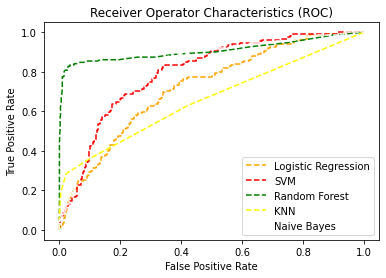

In [109]:
# let's use matplotlib
# plot on the x-axis the false positive rate (fpr)
# plot on the y-axis the true positive rate (tpr)
# assign color per curve
# assign label per curve
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive Bayes")

# add a title and labels to our plot
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Apply legend
plt.legend(loc = 'best')
# save the figure created after plotting data
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC because it is the one that's most skewed to the top left corner. And we can find here also that KNN is the worst which is close to the 45 degree line that we plotted here. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

## TASK #11: CONCLUSION & PROJECT RECAP

In [110]:
# Now that we know which classifier is the best, let's run it again

y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       849
           1       0.93      0.74      0.82       151

    accuracy                           0.95      1000
   macro avg       0.94      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~95% label accuracy
2. Precision: ~95% labeled as Retained customers and ~93% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~74% labeled as churned customers